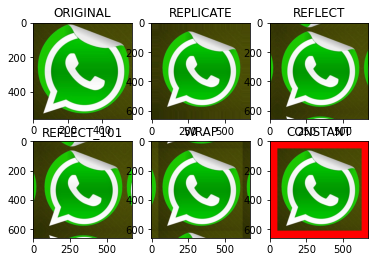

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('whatsapp.jpg')
img2 = cv2.imread('homer.jpg')
replicate = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

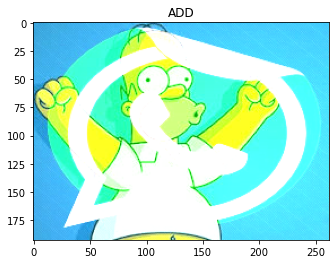

In [3]:
res = cv2.resize(img1, (np.shape(img2)[1],np.shape(img2)[0]))
plt.imshow(cv2.cvtColor(cv2.add(res,img2), cv2.COLOR_BGR2RGB))
plt.title('ADD')
plt.show()

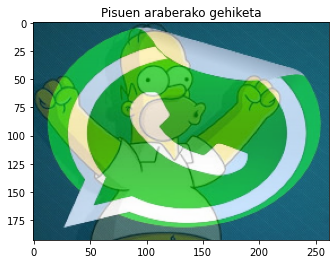

In [4]:
dst = cv2.addWeighted(res,0.7,img2,0.3,0)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Pisuen araberako gehiketa')
plt.show()

In [5]:
# check if optimization is enabled
cv2.setUseOptimized(True)
cv2.useOptimized()

True

In [6]:
%timeit res = cv2.medianBlur(img1,49)

%timeit res = cv2.medianBlur(img2,49)

20.1 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.24 ms ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
imag= cv2.imread('whatsapp.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    imag = cv2.medianBlur(imag,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

0.4171359


In [26]:
print(img1.shape)
print(img2.shape)

(558, 572, 3)
(193, 262, 3)


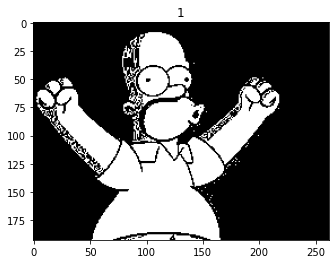

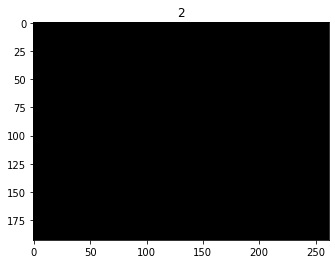

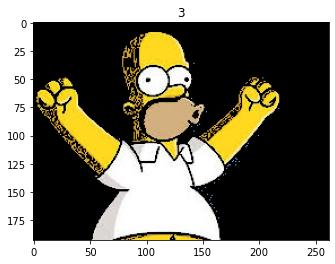

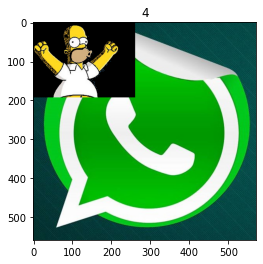

In [27]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 160, 255, cv2.THRESH_BINARY)
ret, mask_inv = cv2.threshold(img2gray, 160, 255, cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title('1')
plt.show()

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.title('2')
plt.show()

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB))
plt.title('3')
plt.show()

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = img2_fg

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('4')
plt.show()